# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in IronHack's database.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [1]:
import pandas as pd
import numpy as np 

In [ ]:
#@ Jan, I've have made the 3 challenge, but after I finish I started to challenge 1;) 

# [ONLY ONE MANDATORY] Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [60]:
temp = pd.read_csv('/Users/bert/Desktop/dataV2-labs/module-2/Subsetting-Descriptive-Stats/Temp_states.csv')

#### Print `temp`.

In [61]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [65]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

In [ ]:
"""
We have 2 mixt datatypes = (object)
The other one is a floating number... 
"""

#### Select the rows where state is New York.

In [68]:
temp_ny = temp[temp['State']=='New York']
temp_ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average temperature of cities in New York?

In [71]:
mean_temp_state_ny = temp_ny.mean()
mean_temp_state_ny

Temperature    10.740741
dtype: float64

#### Which states and cities have a temperature above 15 degrees Celsius?

In [72]:
warm = temp[temp['Temperature'] > 15]
warm

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degrees Celsius.

#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [ ]:
# your code here

#### Find the mean and standard deviation of the temperature of each state.

In [ ]:
# your code here

# [ONLY ONE MANDATORY]  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [ ]:
# your code here

#### Explore the data types of the `employees` dataframe. Comment your results.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### What's the average salary in this company?

In [ ]:
# your code here

#### What's the highest salary?

In [ ]:
# your code here

#### What's the lowest salary?

In [ ]:
# your code here

#### Who are the employees with the lowest salary?

In [ ]:
# your code here

#### Find all the information about an employee called David.

In [ ]:
# your code here

#### Could you return only David's salary?

In [ ]:
# your code here

#### Print all the rows where job title is associate.

In [ ]:
# your code here

#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [ ]:
# Method 1
# your code here

In [ ]:
# Method 2
# your code here

#### Find the employees whose title is associate and whose salary is above 55.

In [ ]:
# your code here

#### Group the employees by number of years of employment. What are the average salaries in each group?

In [ ]:
# your code here

####  What is the average salary per title?

In [ ]:
# your code here

####  Find the salary quartiles.


In [ ]:
# your code here

#### Is the mean salary different per gender?

In [ ]:
# your code here

#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [ ]:
# your code here

#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

In [ ]:
# your code here

# [ONLY ONE MANDATORY] Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [2]:
orders = pd.read_csv('/Users/bert/Desktop/dataV2-labs/module-2/Subsetting-Descriptive-Stats/Orders.csv').drop(['Unnamed: 0'], axis=1)
orders.shape

(397924, 13)

#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [3]:
orders.dtypes
orders.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


In [ ]:
"""
There are almost 400.000 rows. (Data Shape)
There are a lot of integers in this dataset, also a few text/mixed structures and 2 columns with floating points. 

orders.describe().transpose()
--> Invoice NO/year/month/day/hour/CustomerID --> describe don't make sense
--> Quantity / UnitPrice and amount_spent we can use these method. 

"""

####  What is the average purchase price?

In [4]:
avg_price = round(orders['UnitPrice'].mean(), 2)
avg_price

# Here I used the round function because it's present it better. 

3.12

#### What are the highest and lowest purchase prices? 

In [5]:
max_price = orders['UnitPrice'].max()
max_price

min_price = orders['UnitPrice'].min()
min_price

#Minimum price of 0 is not possible, so normally we need to filter them out. 

0.0

#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [6]:
spain = orders[(orders['Country']=='Spain')]


,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?

In [11]:
customers_spain = spain['CustomerID'].nunique()
customers_spain

#I have choosen for nunique() because that counts the unique values. 
# unique() give us the items of the list. 

30

#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [26]:

big_client = orders.groupby('CustomerID').agg({'Quantity':'sum'})
big_client = big_client[(big_client['Quantity'] > 50)]
big_client.sort_values(by= 'Quantity')

#At the end I sorted on the values to see if there were any values under 50 ;) 

,Quantity
CustomerID,
14890,51
15748,51
12587,51
15350,51
15945,52
...,...
12346,74215
12415,77670
14911,80515


#### Select orders from Spain that include more than 50 items.

In [30]:
spain_big = spain.groupby('CustomerID').agg({'Quantity':'sum'})
spain_big = spain_big[(spain_big['Quantity'] > 50)]
spain_big.sort_values(by= 'Quantity')


,Quantity
CustomerID,
12445,62
12551,100
12450,128
12547,134
12544,136
12442,182
12538,191
12448,243
12417,267


#### Select all free orders.

In [33]:
free_item = orders[(orders['UnitPrice'] == 0 )]


(40, 13)

#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [37]:
lunch_order = orders[orders['Description'].str.startswith('lunch bag')]
lunch_order.shape

(11556, 13)

#### Select all `lunch bag` orders made in 2011.

In [39]:
lunch_order2 = lunch_order[lunch_order['year'] == 2011]
lunch_order2

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

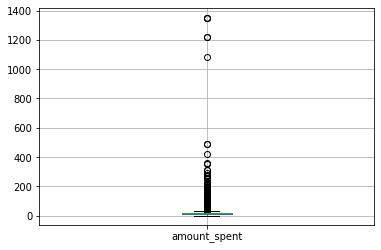

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

spain.boxplot(column="amount_spent")
#spain['amount_spent'].hist()


#### Select all orders made in the month of August.

In [43]:
august = orders[orders['month'] == 8 ]
august

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [55]:
total_august = august.groupby('Country').agg({'Quantity':'sum'})
total_august.sort_values('Quantity', ascending=False)

,Quantity
Country,
United Kingdom,310832
Netherlands,29876
Australia,12570
Germany,9641
EIRE,9331
France,7958
Israel,3028
Switzerland,2998
Belgium,2069


#### What's the  average amount of money spent by country?

In [50]:
avg_spent = orders.groupby('Country').agg({'amount_spent':'mean'})
avg_spent.sort_values('amount_spent', ascending=False)

,amount_spent
Country,
Netherlands,120.798282
Australia,116.895620
Japan,116.561900
Singapore,95.852658
Sweden,85.096075
Denmark,49.882474
Lithuania,47.458857
Lebanon,37.641778
EIRE,36.687745


#### What's the most expensive item?

In [57]:
most_exp = orders[orders['UnitPrice'] == orders['UnitPrice'].max()]
most_exp

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What is the average amount spent per year?

In [59]:
avg_spent = orders.groupby('year').agg({'amount_spent':'mean'})
avg_spent

,amount_spent
year,
2010,21.892733
2011,22.430074
